### Lab1: k-Means Clustering

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
import matplotlib.cm
from scipy.cluster.hierarchy import linkage, dendrogram

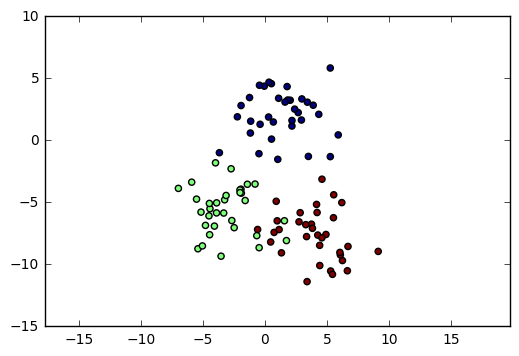

In [41]:
attributes, clusters = make_blobs(cluster_std=2)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

In [42]:
# number of clusters -> 3
k_means = KMeans(3, init = "random")

#passing one dataset
assigned = k_means.fit_predict(attributes)
# plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
# plt.show()
# plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
# plt.show()

In [43]:
assigned

array([0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0,
       2, 1, 2, 2, 2, 1, 2, 0], dtype=int32)

Above we have array with 3 numbers -> 0,1,2, based on the number of 3 clusters we have choosed. Numbers from 0 to number of clusters minus 1.

We are ploting both with the predicted

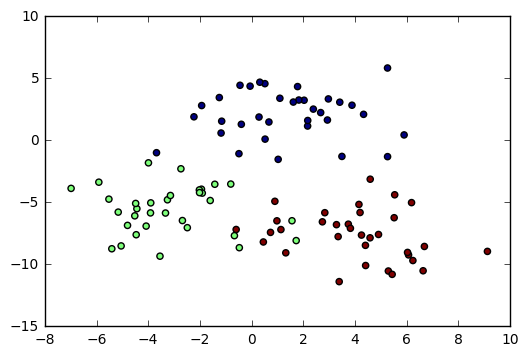

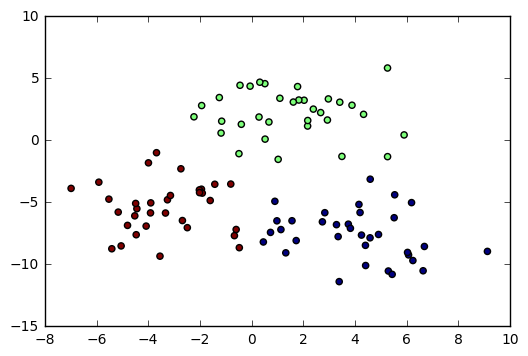

In [44]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.show()

We can see the cluster centers

In [45]:
k_means.cluster_centers_

array([[ 4.00897799, -7.60527423],
       [ 1.49747523,  2.18891157],
       [-3.36294132, -5.41386759]])

Plotting the centers

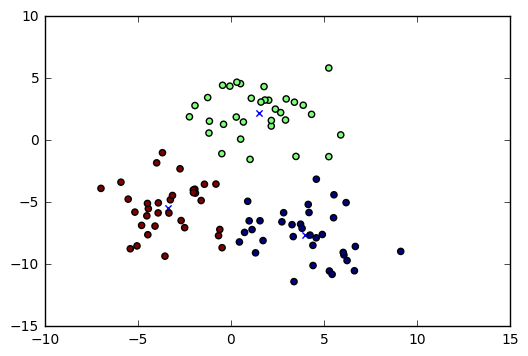

In [47]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.show()

#### 1.1 Generate make_moons dataset

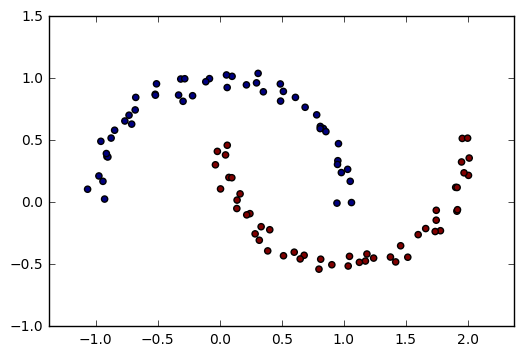

In [48]:
attributes, clusters = make_moons(noise=0.05)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

In [50]:
# making with 2 clusters
k_means = KMeans(2, init = "random")
assigned = k_means.fit_predict(attributes)


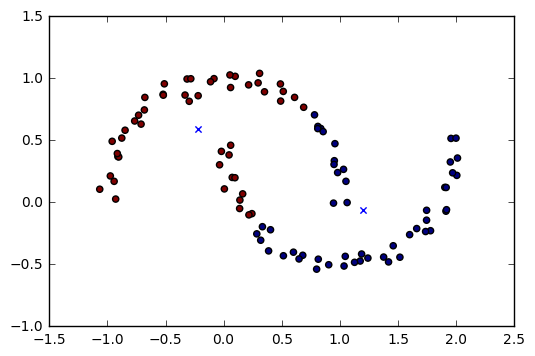

In [51]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.show()

If we increase the number of clusters we will have overfitting - because we have one cluster

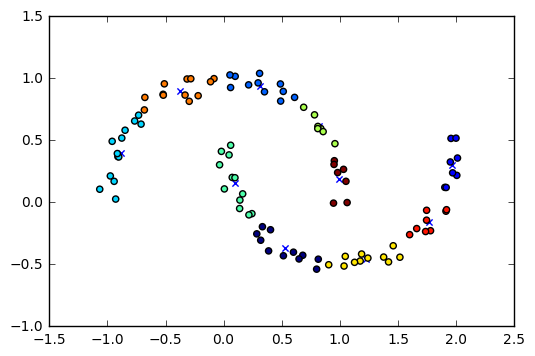

In [52]:
k_means = KMeans(10, init = "random")
assigned = k_means.fit_predict(attributes)

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.show()

#### 1.2 Generate make_circles dataset

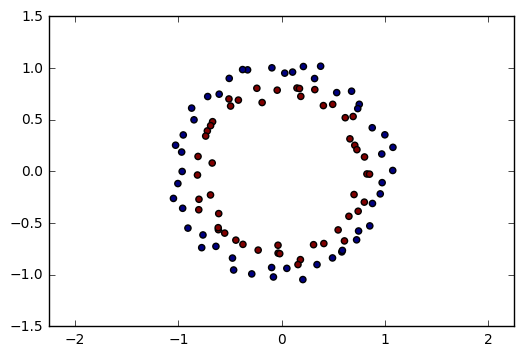

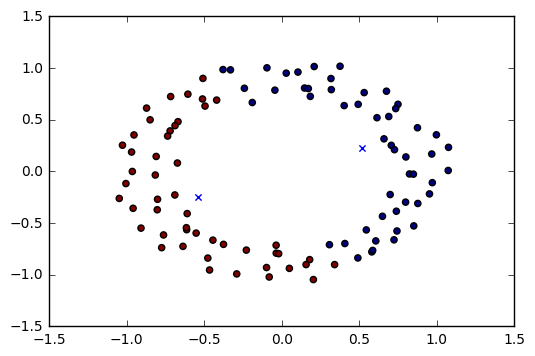

In [62]:
attributes, clusters = make_circles(noise=0.05)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

k_means = KMeans(2, init = "random")
assigned = k_means.fit_predict(attributes)

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.show()

We can see the two centroids. In every cluster the points are closed to its own center. The distance between centers is maximum possible

### Lab2: k-Means++

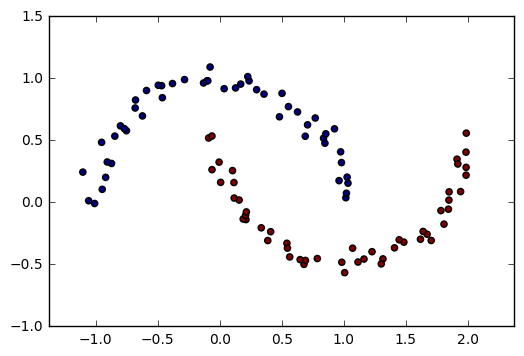

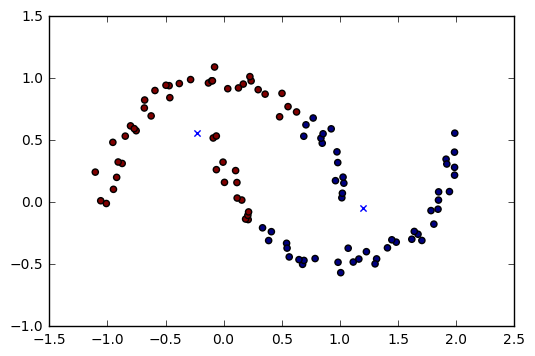

In [64]:
attributes, clusters = make_moons(noise=0.05)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

#k_means = KMeans(3, init = "k-means++")
# without arguments or with init="k-means++" makes is k-means++
k_means = KMeans(2, init = "k-means++")
assigned = k_means.fit_predict(attributes)

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.show()

Generate dataset for blobs

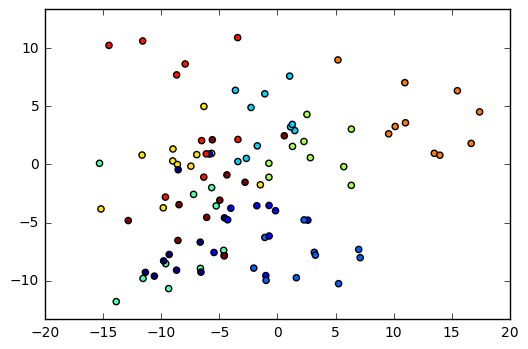

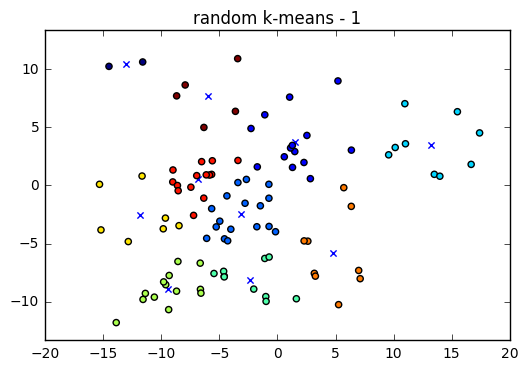

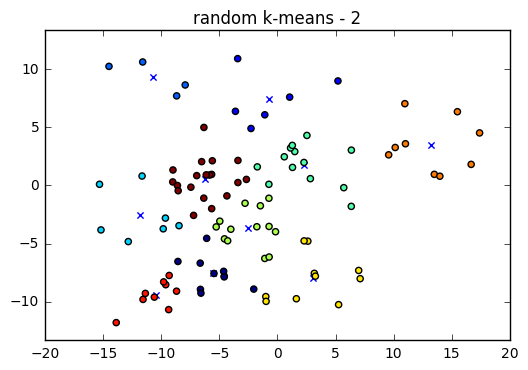

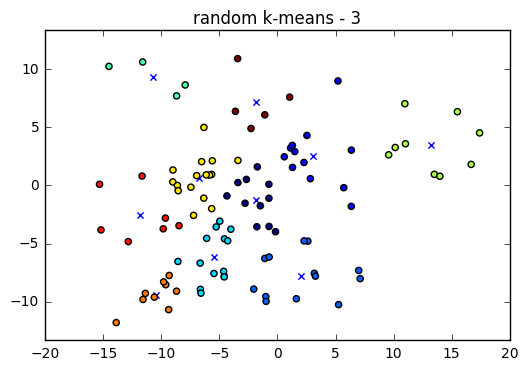

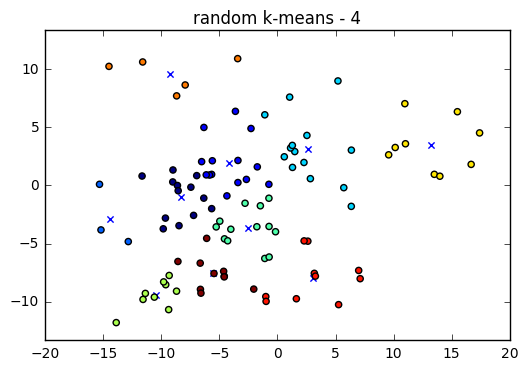

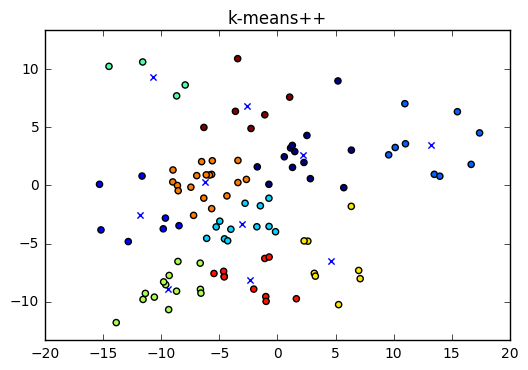

In [75]:
number_of_centers = 10

attributes, clusters = make_blobs(centers=number_of_centers, cluster_std=3.5)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()


def kmeans_random(n):
    k_means = KMeans(number_of_centers, init = "random")
    assigned = k_means.fit_predict(attributes)
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
    plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
    plt.title("random k-means - "+str(n))
    plt.show()

kmeans_random(1)
kmeans_random(2)
kmeans_random(3)
kmeans_random(4)


k_means = KMeans(number_of_centers, init = "k-means++")
assigned = k_means.fit_predict(attributes)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
plt.title("k-means++")
plt.show()

### Lab3. Silhouette Plots

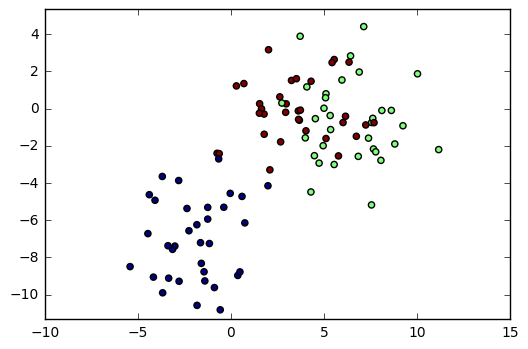

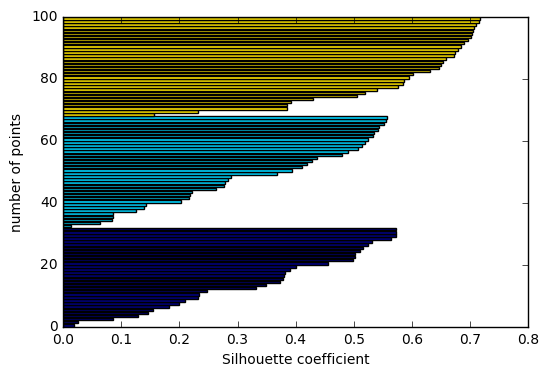

In [11]:
attributes, clusters = make_blobs(cluster_std=2)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()

km = KMeans(3) # Also, 2 and 4
predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
y_min, y_max = 0, 0
y_ticks = []

cluster_labels = np.unique(clusters)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[predicted == c] 
    c_silhouette_vals.sort()
    y_max += len(c_silhouette_vals)
    color = matplotlib.cm.jet(i / cluster_labels.shape[0]) 
    plt.barh(range(y_min, y_max), c_silhouette_vals, color = color)
    y_min += len(c_silhouette_vals)
plt.xlabel("Silhouette coefficient")
plt.ylabel("number of points")

Cluster labes is changed with predicted

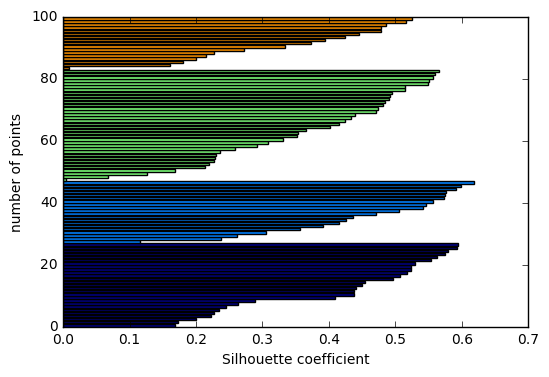

In [12]:
km = KMeans(4) 
predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
y_min, y_max = 0, 0
y_ticks = []

cluster_labels = np.unique(predicted)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[predicted == c] 
    c_silhouette_vals.sort()
    y_max += len(c_silhouette_vals)
    color = matplotlib.cm.jet(i / cluster_labels.shape[0]) 
    plt.barh(range(y_min, y_max), c_silhouette_vals, color = color)
    y_min += len(c_silhouette_vals)
plt.xlabel("Silhouette coefficient")
plt.ylabel("number of points")

Plot with differen kmeans

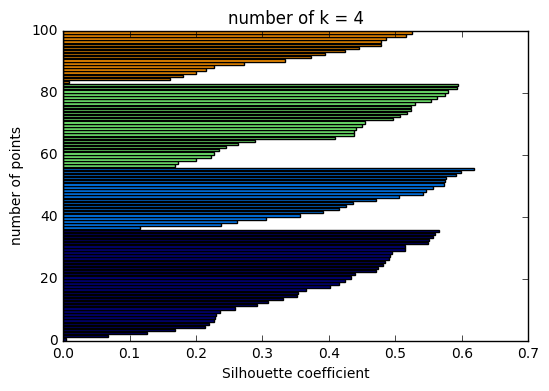

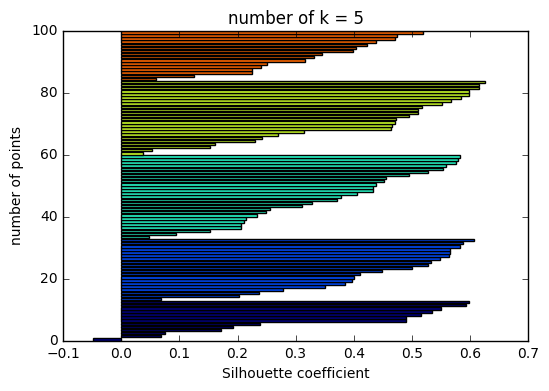

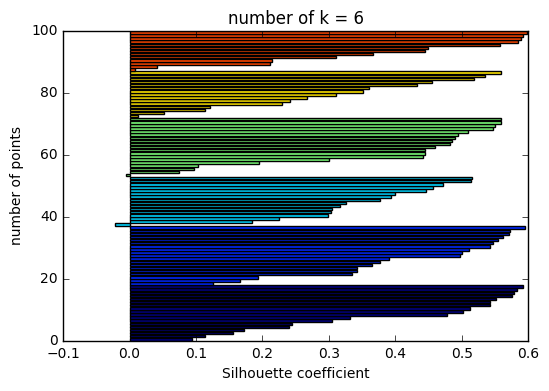

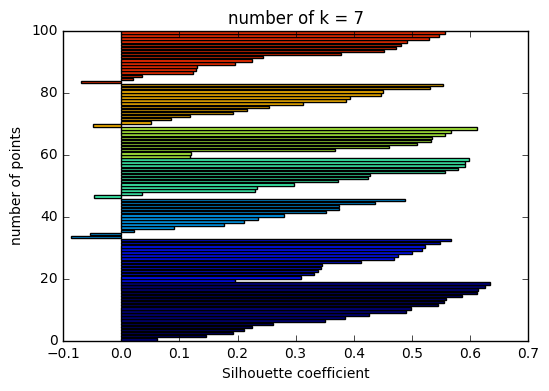

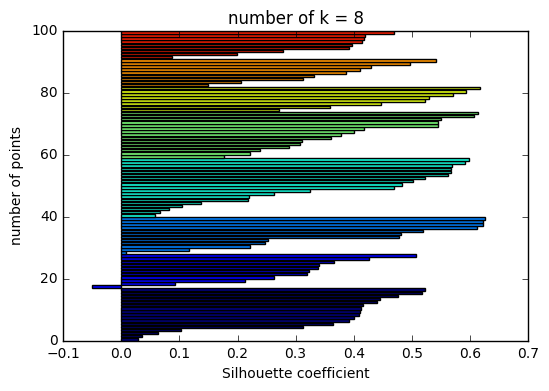

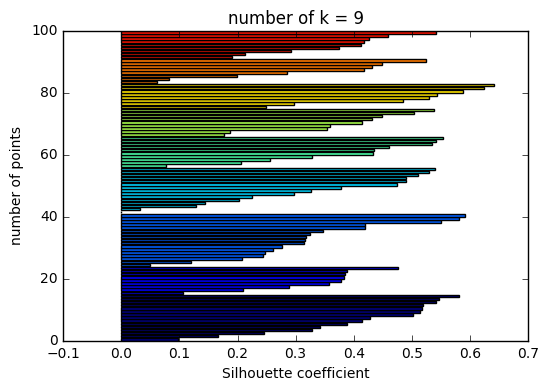

In [14]:
for k in [4, 5, 6, 7, 8, 9]:
    km = KMeans(k) # Also, 2 and 4
    predicted = km.fit_predict(attributes)
    silhouette_vals = silhouette_samples(attributes, predicted)
    y_min, y_max = 0, 0
    y_ticks = []

    cluster_labels = np.unique(predicted)
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[predicted == c] 
        c_silhouette_vals.sort()
        y_max += len(c_silhouette_vals)
        color = matplotlib.cm.jet(i / cluster_labels.shape[0]) 
        plt.barh(range(y_min, y_max), c_silhouette_vals, color = color)
        y_min += len(c_silhouette_vals)
    plt.xlabel("Silhouette coefficient")
    plt.ylabel("number of points")
    plt.title("number of k = " + str(k))
    plt.show()

We should look for simiar profiles. Thoise that have negative values are excluded. We see that we have unbalanced and such clusters wiht outliars. Each line represents coefficient, in example, the last plot, coef 0.54 for the 100th element

In [16]:
aggl = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
aggl_predicted = aggl.fit_predict(attributes)
aggl_predicted

array([0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0])

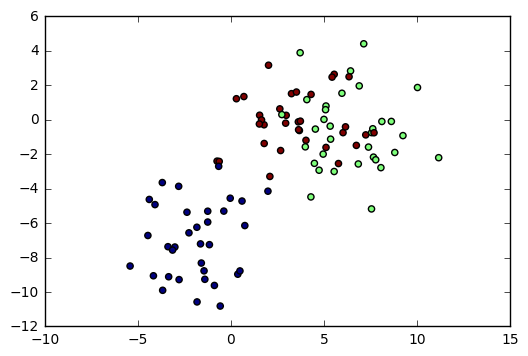

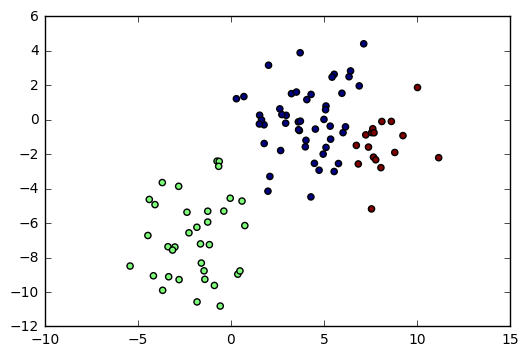

In [21]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()
plt.scatter(attributes[:, 0], attributes[:, 1], c = aggl_predicted)
plt.show()

### Hierarchical Clustering

In [31]:
attributes_moons, clusters_moons = make_moons(noise=0.05)
# process of linking
aggl_moons = AgglomerativeClustering(2, linkage = "ward")
pred_moons = aggl.fit_predict(attributes_moons)
pred_moons

array([1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2,
       0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0])

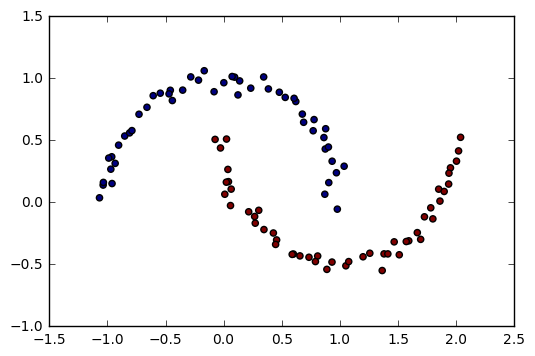

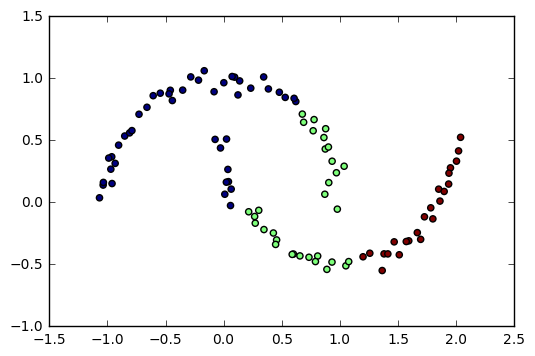

In [32]:
plt.scatter(attributes_moons[:, 0], attributes_moons[:, 1], c = clusters_moons)
plt.show()
plt.scatter(attributes_moons[:, 0], attributes_moons[:, 1], c = pred_moons)
plt.show()

### Lab4: Hierarchical Clustering

Plot a dengrogram

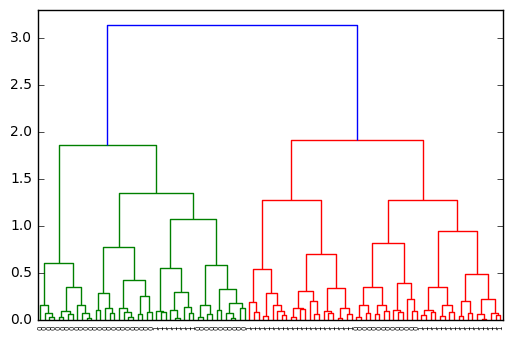

In [35]:
row_clusters = linkage(attributes_moons, method = "complete", metric = "euclidean")
row_dendr = dendrogram(row_clusters, labels = clusters_moons)

In [ ]:
The colors represents different classes